In [1]:
import pandas as pd
import torch
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.size

6912

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#Splitting Model
from sklearn.model_selection import train_test_split
X=df.drop('Outcome',axis=1).values
y=df['Outcome'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
'''
The independent features value are needed to be converted into floats. Dependent 
values can be int
'''
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [11]:
df.shape

(768, 9)

In [12]:
#ANN Model with Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    #Forward Propogation    
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [13]:
#Instantiate ANN Model
torch.manual_seed(20)
model=ANN_Model()
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [17]:
'''
Backward Propogation
1. To Define Loss Function
2. Define the optimizer
'''
loss_function=nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(), lr=0.01)

In [18]:
epochs=500
final_losses=[]
for i in range(epochs):
  i+=1
  y_pred=model.forward(X_train)
  loss=loss_function(y_pred, y_train)
  final_losses.append(loss)
  if i%10==1:
    print(f"Epoch No. {i} and the loss: {loss.item()}")
  #loss will give in key-value pair
  #After every epoch it's creates the gradient of all optimized class---needed while back propogation
  optimizer.zero_grad()
  loss.backward() #To find the derivative
  optimizer.step()





Epoch No. 1 and the loss: 3.4572105407714844
Epoch No. 11 and the loss: 0.8019208312034607
Epoch No. 21 and the loss: 0.6090320944786072
Epoch No. 31 and the loss: 0.5917770862579346
Epoch No. 41 and the loss: 0.5679707527160645
Epoch No. 51 and the loss: 0.5529041886329651
Epoch No. 61 and the loss: 0.5410094857215881
Epoch No. 71 and the loss: 0.5310389399528503
Epoch No. 81 and the loss: 0.5220361351966858
Epoch No. 91 and the loss: 0.5135971903800964
Epoch No. 101 and the loss: 0.5061253905296326
Epoch No. 111 and the loss: 0.4983409643173218
Epoch No. 121 and the loss: 0.4960552752017975
Epoch No. 131 and the loss: 0.4828636944293976
Epoch No. 141 and the loss: 0.4756036400794983
Epoch No. 151 and the loss: 0.4833466410636902
Epoch No. 161 and the loss: 0.48827409744262695
Epoch No. 171 and the loss: 0.4693346619606018
Epoch No. 181 and the loss: 0.4662626087665558
Epoch No. 191 and the loss: 0.4559739828109741
Epoch No. 201 and the loss: 0.4466359317302704
Epoch No. 211 and the l

In [26]:
 #Prediction in X_test
 predictions=[]
 with torch.no_grad():
   for i, data in enumerate(X_test):
     y_pred=model(data)
     predictions.append(y_pred.argmax().item())
     print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [27]:
predictions


[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predictions)

Text(69.0, 0.5, 'Predicted')

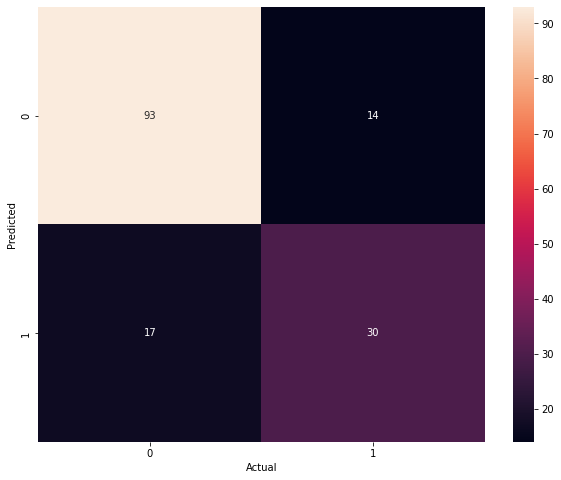

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [31]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, predictions)
score

0.7987012987012987

In [33]:
#To Save Model
torch.save(model, 'diabetes.pt')
#Extension for saving pytorch model is pt
model=torch.load("diabetes.pt") #To save and load model

In [41]:
model.eval

<bound method Module.eval of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [35]:
#Prediction of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [39]:

#New Data
l1=[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [40]:
new_d=torch.tensor(l1)

In [43]:
 #Prediction on new data
with torch.no_grad():
  print(model(new_d))
  print(model(new_d).argmax().item())

tensor([1.1222, 2.0127])
1
